<a href="https://colab.research.google.com/github/bvchand/Diabetes-detection-in-ICU-patients/blob/main/diabetes_feature_selection_with_70_percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from fancyimpute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
cd '/content/drive/Shareddrives/CMPE-255_Project/widsdatathon2021'

/content/drive/Shareddrives/CMPE-255_Project/widsdatathon2021


In [5]:
KNN_imputed_trainX = pickle.load(open("KNN_imputed_trainX_70.pkl", "rb"))
KNN_imputed_testX = pickle.load(open("KNN_imputed_testX_df_70.pkl", "rb"))

diab_train_reduced = pickle.load(open("diab_train_reduced_70.pkl", "rb"))
diabetes_train = pickle.load(open("diabetes_train.pkl", "rb"))
# diab_train_target = diabetes_train['diabetes_mellitus']
diabetes_train_target = pickle.load(open("diabetes_train_y_70.pkl", "rb"))


# from sklearn.model_selection import train_test_split
# train_X,test_X,train_y,test_y = train_test_split(diab_train_reduced, diab_train_target, test_size=0.2)

In [7]:
KNN_imputed_trainX

,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,albumin_apache,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,...,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,age
115201,40.234881,2.0,1.0,185.4,8.0,2.0,0.096528,138.3,2.400000,1208.0,1.0,0.0,0.300000,94.000000,7.070000,4.0,6.0,0.0,5.0,51.000000,58.0,21.800000,0.0,59.0,12.0,134.0,35.0,4690.65600,0.0,16.200000,90.0,44.0,90.0,44.0,71.0,60.0,96.0,60.0,96.0,60.0,...,35.000000,2.600000,2.400000,0.300000,0.300000,94.0,89.0,7.8,7.5,7.07,6.08,171.0,52.0,18.0,16.0,7.8,6.8,24.2,21.8,1.000000,1.000000,325.0,309.0,5.0,4.1,138.0,134.0,16.20,12.90,106.000000,52.000000,1.000000,1.000000,46.516667,38.010000,7.380233,7.310033,146.210000,92.786667,60.000000
5903,30.100790,2.0,1.0,175.3,8.0,2.0,0.000694,92.5,2.803333,1205.0,1.0,0.0,2.147667,21.000000,0.910000,4.0,6.0,0.0,5.0,200.000000,120.0,39.600000,0.0,122.0,43.0,138.0,36.4,1604.41632,0.0,15.100000,98.0,57.0,98.0,57.0,127.0,86.0,122.0,77.0,122.0,77.0,...,36.700000,2.833333,2.793333,2.107667,2.090333,21.0,20.0,8.7,8.5,0.98,0.91,200.0,114.0,24.0,24.0,13.9,13.1,42.1,39.6,1.281667,1.223667,120.0,112.0,4.4,3.9,138.0,138.0,15.10,14.30,115.000000,115.000000,1.281667,1.223667,39.000000,39.000000,7.380000,7.380000,68.000000,68.000000,73.000000
68265,15.500031,2.0,1.0,177.8,15.0,1.0,0.604861,49.0,2.933333,703.0,0.0,0.0,0.984667,25.186667,1.442667,4.0,6.0,0.0,5.0,121.333333,104.0,32.946667,0.0,120.0,60.0,138.7,36.2,5879.77920,0.0,12.029333,96.0,76.0,96.0,76.0,96.0,62.0,110.0,82.0,110.0,82.0,...,36.957333,3.200000,3.200000,0.600000,0.600000,5.0,5.0,8.6,8.6,0.48,0.48,107.0,104.0,23.0,22.6,12.1,12.1,36.0,36.0,1.705667,1.509000,107.0,107.0,3.5,3.5,139.0,139.0,10.90,10.90,127.366667,121.766667,1.705667,1.509000,38.873333,33.613333,7.386300,7.316733,148.576667,96.943333,70.000000
109489,28.069727,5.0,1.0,182.9,15.0,0.0,0.188889,93.9,2.983333,104.0,0.0,0.0,1.103333,20.000000,1.550000,4.0,6.0,0.0,5.0,105.000000,139.0,33.900000,0.0,189.0,35.0,132.0,36.3,5067.61920,0.0,7.600000,94.0,72.0,94.0,72.0,137.0,70.0,184.0,86.0,181.0,86.0,...,36.300000,2.953333,2.943333,1.110000,1.063333,20.0,20.0,8.6,8.6,1.55,1.55,105.0,105.0,27.0,27.0,11.5,11.5,33.9,33.9,1.361000,1.327667,116.0,116.0,3.4,2.8,132.0,132.0,7.60,7.60,172.433333,168.800000,1.361000,1.327667,43.000000,36.000000,7.500000,7.450000,138.000000,78.000000,68.000000
14762,30.722940,3.0,0.0,167.6,3.0,0.0,0.059722,86.3,2.890000,201.0,0.0,0.0,0.703333,27.000000,0.680000,2.0,5.0,0.0,3.0,93.000000,139.0,29.700000,1.0,46.0,33.0,136.0,36.1,973.72800,1.0,27.410000,67.0,40.0,67.0,40.0,128.0,96.0,78.0,51.0,78.0,51.0,...,36.700000,2.953333,2.923333,0.679667,0.663000,27.0,27.0,9.2,9.2,0.68,0.68,118.0,93.0,26.0,26.0,9.7,9.7,29.7,29.7,1.361667,1.338000,347.0,347.0,4.7,4.7,136.0,136.0,27.41,27.41,141.466667,140.300000,1.361667,1.338000,51.900000,48.700000,7.374000,7.353000,57.400000,57.100000,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [8]:
KNN_imputed_trainX = KNN_imputed_trainX[KNN_imputed_testX.columns]

In [ ]:
# KNN_imputed_trainX['diabetes_mellitus'] = diabetes_train_target.values

In [9]:
KNN_imputed_trainX

,age,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,albumin_apache,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,...,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min
115201,60.000000,40.234881,2.0,1.0,185.4,8.0,2.0,0.096528,138.3,2.400000,1208.0,1.0,0.0,0.300000,94.000000,7.070000,4.0,6.0,0.0,5.0,51.000000,58.0,21.800000,0.0,59.0,12.0,134.0,35.0,4690.65600,0.0,16.200000,90.0,44.0,90.0,44.0,71.0,60.0,96.0,60.0,96.0,...,35.000000,35.000000,2.600000,2.400000,0.300000,0.300000,94.0,89.0,7.8,7.5,7.07,6.08,171.0,52.0,18.0,16.0,7.8,6.8,24.2,21.8,1.000000,1.000000,325.0,309.0,5.0,4.1,138.0,134.0,16.20,12.90,106.000000,52.000000,1.000000,1.000000,46.516667,38.010000,7.380233,7.310033,146.210000,92.786667
5903,73.000000,30.100790,2.0,1.0,175.3,8.0,2.0,0.000694,92.5,2.803333,1205.0,1.0,0.0,2.147667,21.000000,0.910000,4.0,6.0,0.0,5.0,200.000000,120.0,39.600000,0.0,122.0,43.0,138.0,36.4,1604.41632,0.0,15.100000,98.0,57.0,98.0,57.0,127.0,86.0,122.0,77.0,122.0,...,36.700000,36.700000,2.833333,2.793333,2.107667,2.090333,21.0,20.0,8.7,8.5,0.98,0.91,200.0,114.0,24.0,24.0,13.9,13.1,42.1,39.6,1.281667,1.223667,120.0,112.0,4.4,3.9,138.0,138.0,15.10,14.30,115.000000,115.000000,1.281667,1.223667,39.000000,39.000000,7.380000,7.380000,68.000000,68.000000
68265,70.000000,15.500031,2.0,1.0,177.8,15.0,1.0,0.604861,49.0,2.933333,703.0,0.0,0.0,0.984667,25.186667,1.442667,4.0,6.0,0.0,5.0,121.333333,104.0,32.946667,0.0,120.0,60.0,138.7,36.2,5879.77920,0.0,12.029333,96.0,76.0,96.0,76.0,96.0,62.0,110.0,82.0,110.0,...,37.247333,36.957333,3.200000,3.200000,0.600000,0.600000,5.0,5.0,8.6,8.6,0.48,0.48,107.0,104.0,23.0,22.6,12.1,12.1,36.0,36.0,1.705667,1.509000,107.0,107.0,3.5,3.5,139.0,139.0,10.90,10.90,127.366667,121.766667,1.705667,1.509000,38.873333,33.613333,7.386300,7.316733,148.576667,96.943333
109489,68.000000,28.069727,5.0,1.0,182.9,15.0,0.0,0.188889,93.9,2.983333,104.0,0.0,0.0,1.103333,20.000000,1.550000,4.0,6.0,0.0,5.0,105.000000,139.0,33.900000,0.0,189.0,35.0,132.0,36.3,5067.61920,0.0,7.600000,94.0,72.0,94.0,72.0,137.0,70.0,184.0,86.0,181.0,...,36.300000,36.300000,2.953333,2.943333,1.110000,1.063333,20.0,20.0,8.6,8.6,1.55,1.55,105.0,105.0,27.0,27.0,11.5,11.5,33.9,33.9,1.361000,1.327667,116.0,116.0,3.4,2.8,132.0,132.0,7.60,7.60,172.433333,168.800000,1.361000,1.327667,43.000000,36.000000,7.500000,7.450000,138.000000,78.000000
14762,51.000000,30.722940,3.0,0.0,167.6,3.0,0.0,0.059722,86.3,2.890000,201.0,0.0,0.0,0.703333,27.000000,0.680000,2.0,5.0,0.0,3.0,93.000000,139.0,29.700000,1.0,46.0,33.0,136.0,36.1,973.72800,1.0,27.410000,67.0,40.0,67.0,40.0,128.0,96.0,78.0,51.0,78.0,...,36.700000,36.700000,2.953333,2.923333,0.679667,0.663000,27.0,27.0,9.2,9.2,0.68,0.68,118.0,93.0,26.0,26.0,9.7,9.7,29.7,29.7,1.361667,1.338000,347.0,347.0,4.7,4.7,136.0,136.0,27.41,27.41,141.466667,140.300000,1.361667,1.338000,51.900000,48.700000,7.374000,7.353000,57.400000,57.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
KNN_imputed_testX

,age,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,albumin_apache,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,...,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min
71328,61.995103,28.178382,2.0,0.0,157.5,15.0,0.0,0.338889,69.900000,2.680000,502.0,0.0,0.0,1.043333,41.00,2.220000,4.0,6.0,0.0,4.0,141.0,119.0,33.143333,0.0,62.0,47.0,137.000000,36.7,2242.92384,0.0,15.796000,60.0,51.0,60.0,51.0,104.0,82.0,86.0,64.0,86.0,...,36.700000,36.700000,2.600000,2.600000,0.700000,0.700000,41.000000,36.000000,8.000000,7.90,2.220000,1.730000,141.000000,123.000000,22.406667,21.700000,12.200000,12.200000,37.000000,37.000000,1.999200,1.881567,87.000000,87.000000,4.000000,3.400000,137.000000,137.000000,40.300000,40.300000,141.000000,141.000000,1.999200,1.881567,26.800000,26.800000,7.320000,7.320000,72.000000,72.000000
107114,74.000000,21.593341,1.0,0.0,145.0,15.0,0.0,0.005556,45.400000,3.303333,704.0,0.0,0.0,0.910000,13.00,1.040000,4.0,6.0,0.0,5.0,100.0,49.0,37.556667,0.0,142.0,12.0,117.000000,36.8,3114.20160,0.0,10.042667,112.0,62.0,112.0,62.0,68.0,50.0,134.0,73.0,134.0,...,36.600000,36.600000,3.333333,3.276667,0.916667,0.913333,13.000000,13.000000,8.200000,8.20,1.040000,1.040000,100.000000,100.000000,24.166667,23.333333,13.103333,12.936667,38.873333,38.333333,1.504000,1.417333,207.966667,204.433333,4.100000,4.100000,130.000000,117.000000,10.154000,9.719667,98.900000,95.533333,1.504000,1.417333,41.226667,39.740000,7.397367,7.379362,153.208833,114.009733
33650,62.000000,30.957006,2.0,0.0,152.4,4.0,1.0,2.962500,71.900000,2.800000,212.0,0.0,0.0,0.400000,16.00,0.630000,2.0,6.0,0.0,1.0,165.0,45.0,31.300000,1.0,44.0,38.0,138.000000,36.6,4387.99680,1.0,13.900000,100.0,31.0,100.0,31.0,109.0,46.0,118.0,61.0,118.0,...,36.600000,36.600000,2.800000,2.600000,0.600000,0.400000,16.000000,15.000000,7.700000,6.90,0.740000,0.630000,165.000000,116.000000,25.000000,24.000000,10.800000,10.100000,31.300000,29.100000,1.839667,1.743333,161.000000,137.000000,3.700000,3.500000,138.000000,135.000000,13.900000,10.600000,134.133333,131.600000,1.839667,1.743333,40.000000,34.000000,7.470000,7.360000,136.000000,68.000000
119933,77.000000,20.338409,2.0,0.0,154.9,3.0,0.0,0.074306,48.800000,3.300000,102.0,0.0,0.0,0.300000,19.00,0.300000,1.0,1.0,0.0,1.0,98.0,107.0,34.276667,1.0,135.0,4.0,143.000000,36.1,1154.47680,1.0,10.615000,72.0,35.0,72.0,35.0,101.0,72.0,126.0,48.0,126.0,...,36.100000,36.100000,3.600000,3.100000,0.300000,0.300000,19.000000,14.000000,9.400000,8.80,0.500000,0.300000,158.000000,98.000000,32.000000,26.000000,11.900000,11.900000,37.200000,37.200000,1.592333,1.478667,242.000000,242.000000,3.900000,3.600000,145.000000,139.000000,10.000000,10.000000,122.466667,121.333333,1.592333,1.478667,45.000000,45.000000,7.450000,7.450000,57.000000,57.000000
3395,51.000000,26.465564,2.0,1.0,172.7,2.0,0.0,0.003472,78.443667,3.400000,408.0,0.0,0.0,1.000000,23.00,0.960000,3.0,5.0,0.0,4.0,89.0,103.0,37.300000,0.0,75.0,43.0,145.000000,37.3,1899.93




# Dimensionality-reduction method 
# PCA -principal components Analysis

In [11]:
#PCA

# Apply standardization before applying PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(KNN_imputed_trainX)

#choose 95 percent variance
pca = PCA(.95)

principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,-4.898169,2.874197,8.046761,-2.743877,-0.900787,3.174363,-1.875981,-3.248080,1.198060,-2.637092,-2.013798,0.579022,-1.128978,-1.871447,0.264797,-0.917775,-1.833475,0.694723,-1.342025,2.676747,1.856790,0.034224,-0.225989,-0.813169,-0.393447,2.635337,0.298862,1.527535,-0.964571,1.585540,-2.253515,-0.872645,0.675996,0.067645,0.574724,-0.706959,-0.867550,0.307977,0.353207,0.133943,0.350694,-1.424912,0.043015,0.451901,0.191822,0.117134,0.920558,-0.009874,-0.314098,0.044461,0.042018,0.385026,-0.443350,-0.256175,0.372610
1,4.537333,1.055739,-1.273389,-0.534465,-0.234680,0.387325,0.477384,-1.105485,2.192713,-0.219605,0.553605,1.238592,1.075119,-1.108346,0.366622,2.434701,0.349164,1.211901,-1.300016,-0.741813,-0.045357,-1.119651,0.271864,-1.112705,-1.341457,-0.748657,0.465548,-0.968897,-0.229811,0.256476,0.336683,-0.679698,0.541013,-0.671927,0.270113,-0.812479,-0.261835,-0.231794,-0.691400,-0.503593,-0.268408,0.258499,-0.591057,-0.027971,-0.780796,0.343439,0.449539,0.617615,0.585952,0.035188,0.508936,0.545962,-0.586371,0.333911,0.555689
2,2.823814,-0.982673,-1.173743,1.065095,-2.027263,-0.473496,1.760323,-0.296272,-1.144900,0.217512,-2.652673,0.190742,1.041105,-0.405915,-0.970788,3.045245,-1.335848,0.025352,-1.334041,0.178601,-1.925388,0.010950,1.004911,-0.202317,-0.378957,2.071293,-1.143208,0.001721,1.652218,1.529319,-2.144979,-0.480193,1.739973,0.701780,-0.554271,1.284647,-0.709200,0.912869,-1.626786,-0.353523,-0.763466,0.073288,-0.083864,0.156987,-0.194828,1.207247,-0.212460,0.827854,-0.599905,-0.027673,-0.206149,-0.161646,-0.149344,0.017490,0.578119
3,8.357520,2.531736,-1.205261,-0.216210,-3.015569,-1.058066,1.030560,-0.315089,0.765240,1.385466,-2.079127,1.572199,-1.181410,-0.046141,-1.048432,0.656969,-1.577156,3.172280,0.883532,0.925961,-0.934853,-1.532057,1.883687,0.183203,-0.353406,1.416213,0.722786,0.252014,-0.076453,0.189334,-2.892196,0.446131,1.282554,-1.361560,-1.547341,0.892274,-0.000179,-0.465397,0.020035,-1.063778,-0.451439,-0.463381,-1.654336,-0.718234,0.681117,0.686201,-0.459697,-1.163267,-0.935012,0.764601,-0.569096,1.208855,0.475363,-0.604703,-0.464430
4,-4.124291,-0.001681,-3.106230,1.527147,-0.372647,1.437537,-1.360468,-1.343175,-1.387887,-3.822914,-0.170956,0.488417,-0.351723,3.842869,1.275073,-2.464553,0.009363,-0.344398,-0.841587,0.586065,0.028302,-1.559476,-0.387068,-0.459457,-1.242665,-1.774671,-0.386146,0.353831,0.225163,-0.730085,-0.602608,-0.184080,-0.159432,-1.255015,0.452169,-0.154929,0.114748,-0.855861,-0.219487,1.355284,0.349783,0.195828,-0.418107,0.199006,-0.231958,-0.585303,-0.680875,-0.118249,-0.761171,-0.600295,0.683824,0.091596,-0.523606,-0.577574,-0.271917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,-0.172888,-4.162043,0.741091,0.394935,0.198418,-0.340376,-1.422902,0.109528,1.218499,0.150372,-1.570920,-2.334316,-1.101338,1.971794,0.519454,-0.439265,-0.534109,0.606070,-0.735055,-0.869702,-0.233234,3.512751,-3.915184,2.394192,3.543671,-1.957186,-1.413482,-0.509656,-0.427915,0.131958,0.168256,-0.304820,0.303275,0.940296,0.286135,-0.307118,0.696612,-0.433106,0.754982,1.244293,0.897874,1.125279,-0.248099,0.083036,-0.865979,0.787571,-0.126836,-0.225226,0.305460,-0.082040,-0.130961,0.345739,-0.263088,-0.184188,0.478497
104121,-5.231285,3.460344,-3.406644,0.151281,3.214496,1.524825,-0.831264,5.038987,1.038889,2.599240,-3.142169,0.551225,0.837430,-2.676257,-0.843936,0.017677,1.076999,0.070901,-1.218202,-2.572382,0.476786,-0.356435,1.199712,-1.006576,0.282425,-1.091606,-0.484705,0.261731,-0.002829,-0.220739,-0.343547,0.190793,0.005956,0.515671,-0.061647,-0.038195,0.554617,-0.068421,-1.503459,1.013870,0.499832,0.670792,0.194317,0.842988,-1.370688,0.653613,-0.390247,0.540

In [12]:
pickle.dump(principalDf, open("pca_95per_train_70.pkl", "wb"))

pca_95per_test_df = pd.DataFrame(pca.transform(KNN_imputed_testX))
print(pca_95per_test_df)
pickle.dump(pca_95per_test_df, open("pca_95per_test_70.pkl", "wb"))


               0           1           2   ...         52          53         54
0      465.103251  180.698971 -214.534722  ... -34.201144 -118.999092  21.377640
1      644.608971  127.829574 -212.232134  ... -33.886312 -114.304973  -6.440378
2      542.331709  141.249850 -272.687554  ...  -2.273784 -114.288833  27.849854
3      427.464887  234.117073 -186.387202  ... -10.692547 -107.886632   5.693800
4      475.281530  152.298193 -212.248554  ... -16.488550 -126.456712  -6.822794
...           ...         ...         ...  ...        ...         ...        ...
26027  456.394312  158.570954 -166.777247  ... -32.088392 -113.233617   9.371546
26028  357.161185  129.178532 -155.860533  ...   3.981536 -111.087180   9.523683
26029  501.780057   75.272879 -268.374228  ... -17.875415 -135.981317 -18.914513
26030  603.006075  274.942799 -258.081109  ... -38.311282 -136.288730 -28.831852
26031  563.918275  269.600860 -244.611549  ... -34.017324 -115.148820  -8.573025

[26032 rows x 55 columns]


In [13]:
#choose 97 percent variance
pca = PCA(.97)

principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-4.898169,2.874197,8.046761,-2.743877,-0.900787,3.174363,-1.875981,-3.248080,1.198060,-2.637092,-2.013798,0.579022,-1.128978,-1.871447,0.264797,-0.917775,-1.833475,0.694723,-1.342025,2.676747,1.856790,0.034224,-0.225989,-0.813169,-0.393447,2.635337,0.298862,1.527535,-0.964571,1.585540,-2.253515,-0.872645,0.675996,0.067645,0.574724,-0.706959,-0.867550,0.307977,0.353207,0.133943,0.350694,-1.424912,0.043015,0.451901,0.191822,0.117134,0.920558,-0.009874,-0.314098,0.044461,0.042018,0.385026,-0.443350,-0.256175,0.372610,-0.523213,0.526402,0.036091,0.137001,-0.090975,0.063429,0.342112,-0.222324
1,4.537333,1.055739,-1.273389,-0.534465,-0.234680,0.387325,0.477384,-1.105485,2.192713,-0.219605,0.553605,1.238592,1.075119,-1.108346,0.366622,2.434701,0.349164,1.211901,-1.300016,-0.741813,-0.045357,-1.119651,0.271864,-1.112705,-1.341457,-0.748657,0.465548,-0.968897,-0.229811,0.256476,0.336683,-0.679698,0.541013,-0.671927,0.270113,-0.812479,-0.261835,-0.231794,-0.691400,-0.503593,-0.268408,0.258499,-0.591057,-0.027971,-0.780796,0.343439,0.449539,0.617615,0.585952,0.035188,0.508936,0.545962,-0.586371,0.333911,0.555689,0.063224,0.235359,-0.050565,-0.243016,0.179342,-0.010456,0.231822,-0.240748
2,2.823814,-0.982673,-1.173743,1.065095,-2.027263,-0.473496,1.760323,-0.296272,-1.144900,0.217512,-2.652673,0.190742,1.041105,-0.405915,-0.970788,3.045245,-1.335848,0.025352,-1.334041,0.178601,-1.925388,0.010950,1.004911,-0.202317,-0.378957,2.071293,-1.143208,0.001721,1.652218,1.529319,-2.144979,-0.480193,1.739973,0.701780,-0.554271,1.284647,-0.709200,0.912869,-1.626786,-0.353523,-0.763466,0.073288,-0.083864,0.156987,-0.194828,1.207247,-0.212460,0.827854,-0.599905,-0.027673,-0.206149,-0.161646,-0.149344,0.017490,0.578119,-0.517178,0.188590,-1.020669,-0.026585,0.230630,0.154217,0.137616,0.124055
3,8.357520,2.531736,-1.205261,-0.216210,-3.015569,-1.058066,1.030560,-0.315089,0.765240,1.385466,-2.079127,1.572199,-1.181410,-0.046141,-1.048432,0.656969,-1.577156,3.172280,0.883532,0.925961,-0.934853,-1.532057,1.883687,0.183203,-0.353406,1.416213,0.722786,0.252014,-0.076453,0.189334,-2.892196,0.446131,1.282554,-1.361560,-1.547341,0.892274,-0.000179,-0.465397,0.020035,-1.063778,-0.451439,-0.463381,-1.654336,-0.718234,0.681117,0.686201,-0.459697,-1.163267,-0.935012,0.764601,-0.569096,1.208855,0.475363,-0.604703,-0.464430,-0.185038,-0.472692,1.331191,-0.121820,0.209464,-0.018887,-1.593225,1.059190
4,-4.124291,-0.001681,-3.106230,1.527147,-0.372647,1.437537,-1.360468,-1.343175,-1.387887,-3.822914,-0.170956,0.488417,-0.351723,3.842869,1.275073,-2.464553,0.009363,-0.344398,-0.841587,0.586065,0.028302,-1.559476,-0.387068,-0.459457,-1.242665,-1.774671,-0.386146,0.353831,0.225163,-0.730085,-0.602608,-0.184080,-0.159432,-1.255015,0.452169,-0.154929,0.114748,-0.855861,-0.219487,1.355284,0.349783,0.195828,-0.418107,0.199006,-0.231958,-0.585303,-0.680875,-0.118249,-0.761171,-0.600295,0.683824,0.091596,-0.523606,-0.577574,-0.271917,0.170057,0.125851,-0.030111,-0.001973,-0.850700,-0.338238,-0.075088,0.088840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,-0.172888,-4.162043,0.741091,0.394935,0.198418,-0.340376,-1.422902,0.109528,1.218499,0.150372,-1.570920,-2.334316,-1.101338,1.971794,0.519454,-0.439265,-0.534109,0.606070,-0.735055,-0.869702,-0.233234,3.512751,-3.915184,2.394192,3.543671,-1.957186,-1.413482,-0.509656,-0.427915,0.131958,0.168256,-0.304820,0.303275,0.940296,0.286135,-0.307118,0.696612,-0.433106,0.754982,1.244293,0.897874,1.125279,-0.248099,0.083036,-0.865979,0.787571,-0.126836,-0.225226,0.305460,-0.082040,-0.130961,0.345739,-0.263088,-0.184188,0.478497,0.121211,-0.084058,-

In [14]:
pickle.dump(principalDf, open("pca_97per_train_70.pkl", "wb"))

pca_97per_test_df = pd.DataFrame(pca.transform(KNN_imputed_testX))
print(pca_97per_test_df)
pickle.dump(pca_97per_test_df, open("pca_97per_test_70.pkl", "wb"))

               0           1           2   ...         60         61         62
0      465.103251  180.698971 -214.534722  ...   2.882792  15.074379  18.065607
1      644.608971  127.829574 -212.232134  ... -13.546056  21.087603  21.653808
2      542.331709  141.249850 -272.687554  ... -59.231295  54.442509  34.007779
3      427.464887  234.117073 -186.387202  ...  -8.050021  -9.772592  28.311989
4      475.281530  152.298193 -212.248554  ... -12.236612   9.450498  13.692052
...           ...         ...         ...  ...        ...        ...        ...
26027  456.394312  158.570954 -166.777247  ...  -8.588030   5.654346   7.912293
26028  357.161185  129.178532 -155.860533  ... -34.690838  14.571213  20.553670
26029  501.780057   75.272879 -268.374228  ... -17.022333  24.192174  28.391934
26030  603.006075  274.942799 -258.081109  ...  -9.324498  28.729092   4.105544
26031  563.918275  269.600860 -244.611549  ...  -6.661879   4.098359  -3.590391

[26032 rows x 63 columns]


In [15]:
#choose 99 percent variance
pca = PCA(.99)

principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,-4.898169,2.874197,8.046761,-2.743877,-0.900787,3.174363,-1.875981,-3.248080,1.198060,-2.637092,-2.013798,0.579022,-1.128978,-1.871447,0.264797,-0.917775,-1.833475,0.694723,-1.342025,2.676747,1.856790,0.034224,-0.225989,-0.813169,-0.393447,2.635337,0.298862,1.527535,-0.964571,1.585540,-2.253515,-0.872645,0.675996,0.067645,0.574724,-0.706959,-0.867550,0.307977,0.353207,0.133943,0.350694,-1.424912,0.043015,0.451901,0.191822,0.117134,0.920558,-0.009874,-0.314098,0.044461,0.042018,0.385026,-0.443350,-0.256175,0.372610,-0.523213,0.526402,0.036091,0.137001,-0.090975,0.063429,0.342112,-0.222324,-0.149810,-0.112952,0.097171,0.132283,-0.099882,-0.082191,0.227024,0.215113,0.259542,0.087464,0.080654,0.007915,0.156680,-0.011865,0.012819
1,4.537333,1.055739,-1.273389,-0.534465,-0.234680,0.387325,0.477384,-1.105485,2.192713,-0.219605,0.553605,1.238592,1.075119,-1.108346,0.366622,2.434701,0.349164,1.211901,-1.300016,-0.741813,-0.045357,-1.119651,0.271864,-1.112705,-1.341457,-0.748657,0.465548,-0.968897,-0.229811,0.256476,0.336683,-0.679698,0.541013,-0.671927,0.270113,-0.812479,-0.261835,-0.231794,-0.691400,-0.503593,-0.268408,0.258499,-0.591057,-0.027971,-0.780796,0.343439,0.449539,0.617615,0.585952,0.035188,0.508936,0.545962,-0.586371,0.333911,0.555689,0.063224,0.235359,-0.050565,-0.243016,0.179342,-0.010456,0.231822,-0.240748,0.002850,0.097255,0.087040,-0.450391,0.212912,-0.158745,0.436734,-0.081676,0.154297,-0.010728,0.032482,-0.015977,-0.073639,0.083614,0.193193
2,2.823814,-0.982673,-1.173743,1.065095,-2.027263,-0.473496,1.760323,-0.296272,-1.144900,0.217512,-2.652673,0.190742,1.041105,-0.405915,-0.970788,3.045245,-1.335848,0.025352,-1.334041,0.178601,-1.925388,0.010950,1.004911,-0.202317,-0.378957,2.071293,-1.143208,0.001721,1.652218,1.529319,-2.144979,-0.480193,1.739973,0.701780,-0.554271,1.284647,-0.709200,0.912869,-1.626786,-0.353523,-0.763466,0.073288,-0.083864,0.156987,-0.194828,1.207247,-0.212460,0.827854,-0.599905,-0.027673,-0.206149,-0.161646,-0.149344,0.017490,0.578119,-0.517178,0.188590,-1.020669,-0.026585,0.230630,0.154217,0.137616,0.124055,0.603168,-0.433378,-0.116578,0.296107,0.127243,-0.901176,-0.320023,-0.219463,0.014482,0.310805,-0.480502,-0.348659,0.084301,-0.011337,0.069232
3,8.357520,2.531736,-1.205261,-0.216210,-3.015569,-1.058066,1.030560,-0.315089,0.765240,1.385466,-2.079127,1.572199,-1.181410,-0.046141,-1.048432,0.656969,-1.577156,3.172280,0.883532,0.925961,-0.934853,-1.532057,1.883687,0.183203,-0.353406,1.416213,0.722786,0.252014,-0.076453,0.189334,-2.892196,0.446131,1.282554,-1.361560,-1.547341,0.892274,-0.000179,-0.465397,0.020035,-1.063778,-0.451439,-0.463381,-1.654336,-0.718234,0.681117,0.686201,-0.459697,-1.163267,-0.935012,0.764601,-0.569096,1.208855,0.475363,-0.604703,-0.464430,-0.185038,-0.472692,1.331191,-0.121820,0.209464,-0.018887,-1.593225,1.059190,-0.225461,0.144092,-0.077928,-0.123502,-0.635436,0.259117,0.315884,1.369747,-0.189054,0.355610,-0.060493,0.000633,-1.870333,-0.967545,0.014616
4,-4.124291,-0.001681,-3.106230,1.527147,-0.372647,1.437537,-1.360468,-1.343175,-1.387887,-3.822914,-0.170956,0.488417,-0.351723,3.842869,1.275073,-2.464553,0.009363,-0.344398,-0.841587,0.586065,0.028302,-1.559476,-0.387068,-0.459457,-1.242665,-1.774671,-0.386146,0.353831,0.225163,-0.730085,-0.602608,-0.184080,-0.159432,-1.255015,0.452169,-0.154929,0.114748,-0.855861,-0.219487,1.355284,0.349783,0.195828,-0.418107,0.199006,-0.231958,-0.585303,-0.680875,-0.118249,-0.761171,-0.600295,0.683824,0.091596,-0.523606,-0.577574,-0.271917,0.170057,0.125851,-0.030111,-0.001973,-0.850700,-0.338238,-0.075088,0.088840,-0.258499,0.096185,-0.861282,0.016781,0.147008,-0.151240,-0.061560,0.150768,0.037832,-0.187556,-0.052685,-0.088659,0.051247,0.017755,0.017353
...,...,...,...,...,...,...,...,...,...,...,...,...,

In [16]:
pickle.dump(principalDf, open("pca_99per_train_70.pkl", "wb"))

pca_99per_test_df = pd.DataFrame(pca.transform(KNN_imputed_testX))
print(pca_99per_test_df)
pickle.dump(pca_99per_test_df, open("pca_99per_test_70.pkl", "wb"))

               0           1           2   ...         75         76         77
0      465.103251  180.698971 -214.534722  ...  -9.969881  10.609180  -5.775999
1      644.608971  127.829574 -212.232134  ... -12.789308  10.816761 -26.821255
2      542.331709  141.249850 -272.687554  ...   4.205465  63.430058  22.129096
3      427.464887  234.117073 -186.387202  ...  11.334654  16.107629   7.691603
4      475.281530  152.298193 -212.248554  ...   3.359480  16.885587  -8.262320
...           ...         ...         ...  ...        ...        ...        ...
26027  456.394312  158.570954 -166.777247  ...  -2.593809   1.058923 -23.168763
26028  357.161185  129.178532 -155.860533  ...  -1.697882  20.183063  11.682243
26029  501.780057   75.272879 -268.374228  ... -10.321670  21.844242  -9.415447
26030  603.006075  274.942799 -258.081109  ...  -1.107985   9.302877 -23.754540
26031  563.918275  269.600860 -244.611549  ...   0.576362  -2.654468 -16.313872

[26032 rows x 78 columns]


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


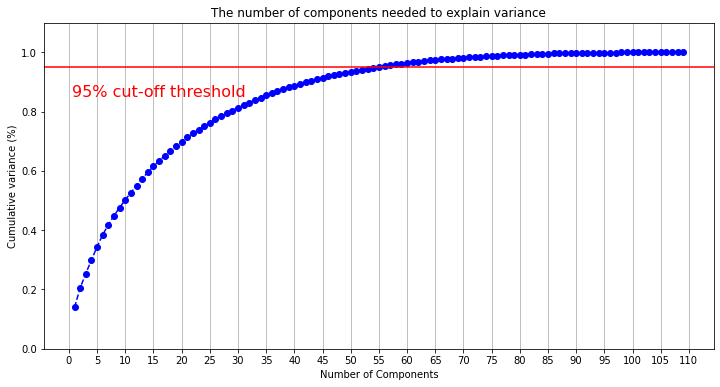

In [19]:
pca = PCA().fit(scaled)

% matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 110, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

print(type(xi))
print(type(y))

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 115, step=5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Based on the above plot we should not go below 55 columns because that will lead to less than 95 percent variance.

# Feature importance and selection

In [ ]:
sns.set(style='ticks')
pp = sns.pairplot(KNN_imputed_trainX)
pp.savefig("KNN_imputed_trainX_pairplot.png")

In [ ]:
Image(filename='KNN_imputed_trainX_pairplot.png', width = 1000, height = 500)

## 1. Feature importance using correlation

In [ ]:
diabetes_cor = KNN_imputed_trainX.corr()

In [ ]:
diabetes_cor

In [ ]:
cols = diabetes_cor['diabetes_mellitus']>0.5

In [ ]:
cols

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(diabetes_cor, ax=ax, cmap='viridis')

In [ ]:
cor_target = abs(diabetes_cor["diabetes_mellitus"])

relevant_features = diabetes_cor[cor_target>0.5]
relevant_features['diabetes_mellitus']

In [ ]:
diabetes_cor.nlargest(10, ['diabetes_mellitus'])['diabetes_mellitus']

No features have a correlation above strongly correlated with target variable

## 2. Feature importance using backward elimination (p-values)

In [ ]:
train_X = KNN_imputed_trainX.drop(columns='diabetes_mellitus')
train_y = diabetes_train_target

In [ ]:
cols = list(train_X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    updated_X = train_X[cols]
    updated_X = sm.add_constant(updated_X)
    model = sm.OLS(list(train_y),updated_X).fit()
    pval = pd.Series(model.pvalues,index = cols)    
    pmax = max(pval)
    feature_with_p_max = pval.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
features_BE = cols
print(features_BE)

## 3. Feature importance using mutual information

In [ ]:
feature_scores = mutual_info_classif(train_X, train_y, random_state=42)

In [ ]:
mi_scores = pd.Series(feature_scores, index=train_X.columns)
mi_scores.nlargest(10)